<h1>Higgins Bosson Event Detection</h1>
<hr>
<h2>Project 5</h2>
<p>This project train artificial neural networks to detect the decay of the Higgs boson to tau leptons on a dataset of 82 million simulated collision events.</p>
<hr>

In [2]:
#libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import trunc
from autoviz.AutoViz_Class import AutoViz_Class
from autoviz import data_cleaning_suggestions

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio

from utilerias import exact_values_table
from utilerias import features_by_type
from utilerias import plot_features_distribution

pio.renderers.default='notebook'

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<hr>
<p>Read the dataset</p>
<hr>

In [3]:
df_bosson = pd.read_csv('../datasets/training.csv')

In [4]:
df_bosson.shape

(250000, 33)

In [5]:
df_bosson

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [6]:
#let's standarize some features, before to proceed with the EDA
#Eliminate spaces and upper cases from name columns
df_bosson.columns=df_bosson.columns.str.lower().str.replace(' ', '_')

In [7]:
df_bosson.dtypes

eventid                          int64
der_mass_mmc                   float64
der_mass_transverse_met_lep    float64
der_mass_vis                   float64
der_pt_h                       float64
der_deltaeta_jet_jet           float64
der_mass_jet_jet               float64
der_prodeta_jet_jet            float64
der_deltar_tau_lep             float64
der_pt_tot                     float64
der_sum_pt                     float64
der_pt_ratio_lep_tau           float64
der_met_phi_centrality         float64
der_lep_eta_centrality         float64
pri_tau_pt                     float64
pri_tau_eta                    float64
pri_tau_phi                    float64
pri_lep_pt                     float64
pri_lep_eta                    float64
pri_lep_phi                    float64
pri_met                        float64
pri_met_phi                    float64
pri_met_sumet                  float64
pri_jet_num                      int64
pri_jet_leading_pt             float64
pri_jet_leading_eta      

it can happen that for some entries some variables are meaningless or cannot be computed; in this case, their value is −999.0, which is outside the normal range of all variables

In [8]:
# Count of column datatypes for the training dataset
print('Number on features by type')
print('============================')
table = features_by_type(df_bosson)

table.style.background_gradient(cmap='Greens')
#table.shape

Number on features by type


,Integer,Float,Object
Features,2,30,1


In [6]:
data_cleaning_suggestions(df_bosson)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
eventid,250000,int64,0,0.000000,100.000000,0,possible ID column: drop
pri_met_sumet,179740,float64,0,0.000000,71.896000,0,skewed: cap or drop outliers
der_sum_pt,156098,float64,0,0.000000,62.439200,0,skewed: cap or drop outliers
der_pt_h,115563,float64,0,0.000000,46.225200,0,skewed: cap or drop outliers
der_mass_mmc,108338,float64,0,0.000000,43.335200,0,skewed: cap or drop outliers
weight,104096,float64,0,0.000000,41.638400,0,
pri_jet_all_pt,103559,float64,0,0.000000,41.423600,0,skewed: cap or drop outliers
der_mass_transverse_met_lep,101637,float64,0,0.000000,40.654800,0,skewed: cap or drop outliers
der_mass_vis,100558,float64,0,0.000000,40.223200,0,skewed: cap or drop outliers
pri_met,87836,float64,0,0.000000,35.134400,0,highly skewed: drop outliers or do box-cox transform


there are no missing values, but documentation says -999 was placed as a not calculated or outlier value for some features.

In [9]:
#lets count how many columns and rows have -999 value and its proportion in the dataset
table = exact_values_table(df_bosson,-999)
table.style.background_gradient(cmap='Greens')

Sumary :
Columns     :33
f values :33


,f Values,% of Total Values
pri_jet_subleading_pt,177457,71.000000
pri_jet_subleading_phi,177457,71.000000
der_deltaeta_jet_jet,177457,71.000000
der_mass_jet_jet,177457,71.000000
der_prodeta_jet_jet,177457,71.000000
pri_jet_subleading_eta,177457,71.000000
der_lep_eta_centrality,177457,71.000000
pri_jet_leading_phi,99913,40.000000
pri_jet_leading_eta,99913,40.000000
pri_jet_leading_pt,99913,40.000000


This is the real overview of missing values.. those features that have -999

In [10]:
# to include categorical columns
df_bosson.describe(include=['O']).T

,count,unique,top,freq
label,250000,2,b,164333


In [11]:
df_bosson['label'].value_counts()

b    164333
s     85667
Name: label, dtype: int64

In [12]:
#duplicates
print("Number of duplicates: ", df_bosson.duplicated().sum())

Number of duplicates:  0


In [13]:
 #Constant columns
df_bosson.columns[df_bosson.nunique() == 1].tolist()

[]

There are no duplicates neither constant columns

In [14]:
df_bosson['pri_jet_num'].value_counts()

0    99913
1    77544
2    50379
3    22164
Name: pri_jet_num, dtype: int64

In [15]:
#let's see the statistical desription for the rest of variables
df_bosson.describe()

,eventid,der_mass_mmc,der_mass_transverse_met_lep,der_mass_vis,der_pt_h,der_deltaeta_jet_jet,der_mass_jet_jet,der_prodeta_jet_jet,der_deltar_tau_lep,der_pt_tot,...,pri_met_sumet,pri_jet_num,pri_jet_leading_pt,pri_jet_leading_eta,pri_jet_leading_phi,pri_jet_subleading_pt,pri_jet_subleading_eta,pri_jet_subleading_phi,pri_jet_all_pt,weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


<hr>
Univariate Analysis
<hr>

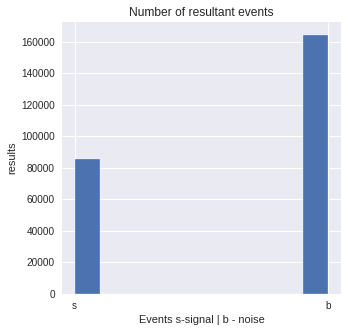

In [16]:
#Label is the target variable
fig = plt.figure(figsize = (5, 5))
plt.hist(df_bosson['label'],orientation='vertical')
 
plt.xlabel("Events s-signal | b - noise")
plt.ylabel("results")
plt.title("Number of resultant events")
plt.show()

In [17]:
((df_bosson.groupby(['label']).size() / df_bosson["label"].count()) * 100).add_prefix('Events (in %) results in ')

label
Events (in %) results in b    65.7332
Events (in %) results in s    34.2668
dtype: float64

An event has a probability of 65.73% to result as "background noise", over 34.26 to result a "signal"

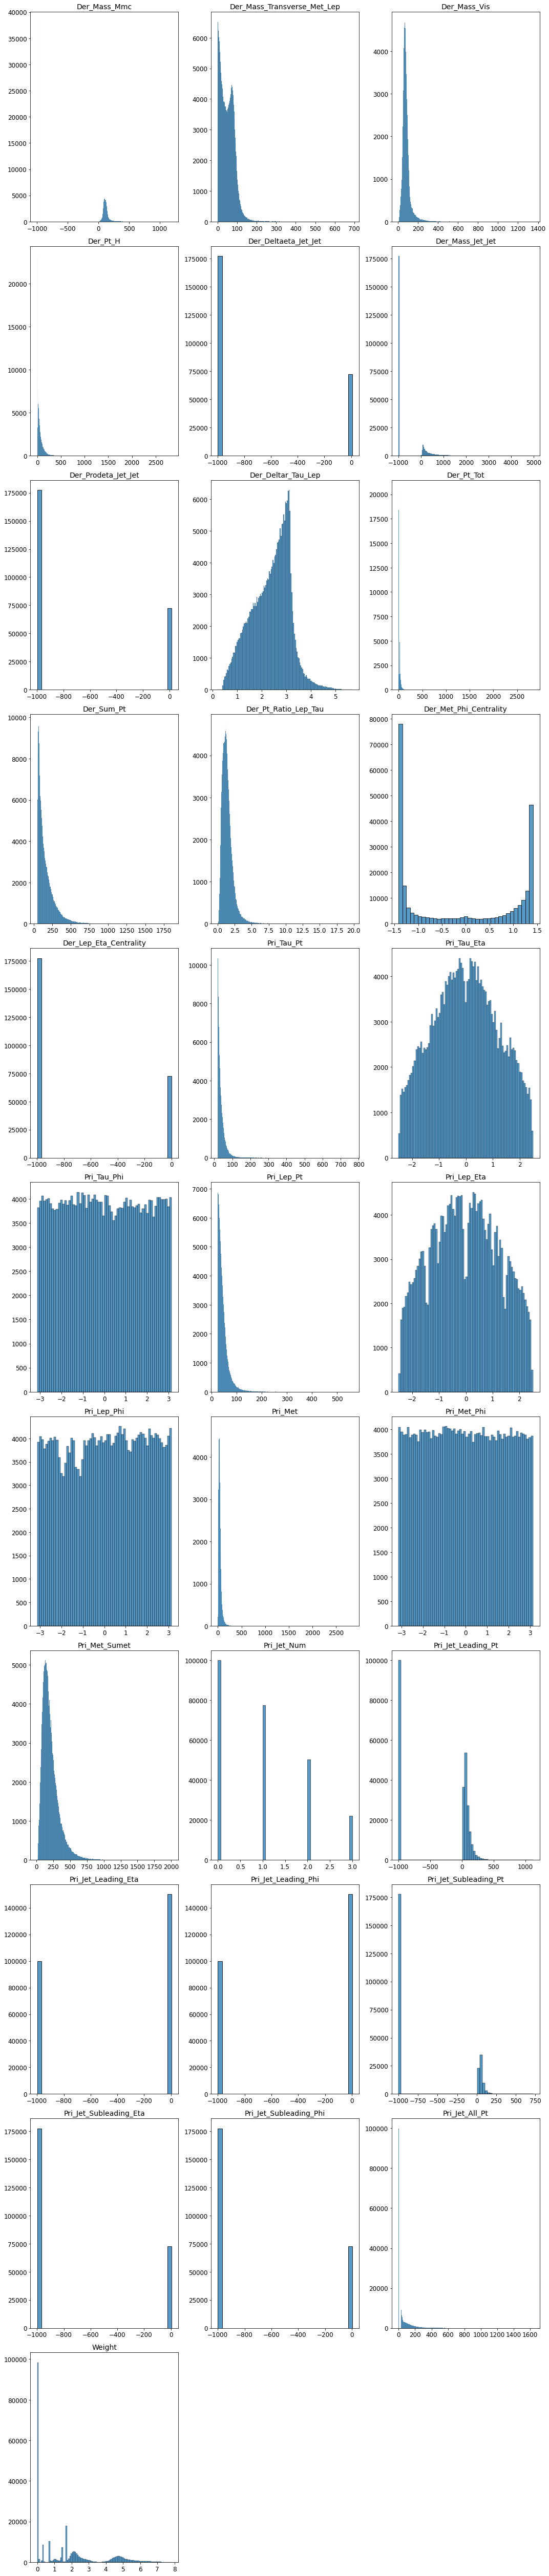

In [5]:
#let0s grpah all the features individually
plot_features_distribution(df_bosson.drop(['label','eventid'], axis=1))


<hr>
Multivariate Analysis
<hr>

<AxesSubplot:>

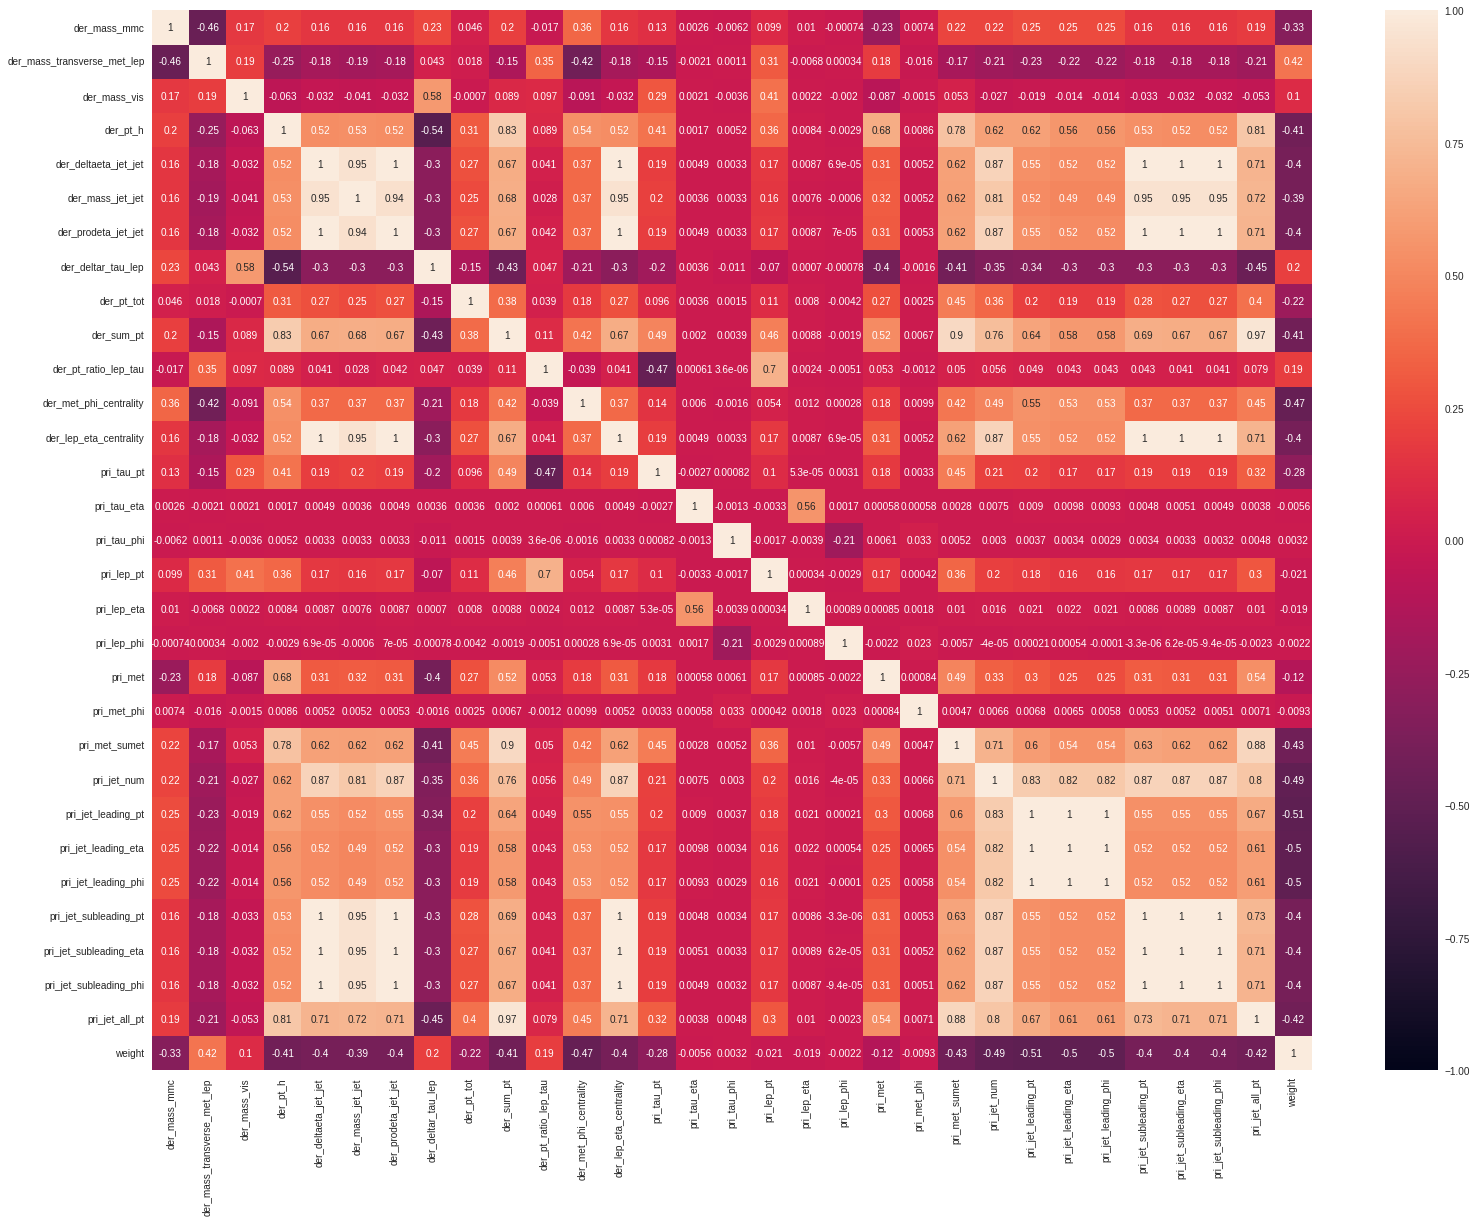

In [18]:
#correlation
plt.figure(figsize = (26, 19.5))
sns.heatmap(df_bosson.drop(['label','eventid'], axis=1).corr(), vmin = -1, vmax = 1, annot = True)


let's save the dataset, because the name's changes I did in order to standarize them

In [ ]:
df_bosson.to_csv('../datasets/training_post_EDA.csv', index=False)